* 참고 자료: https://kongdols-room.tistory.com/123 # 인덱스 재설정
* 축 회전: https://velog.io/@withdongyeong/20211224
* 격자 무늬 생성: https://jimmy-ai.tistory.com/114
* https://seong6496.tistory.com/120 # 날짜 생성


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Mission 1. Neflix and Code

## Mandatory Part
넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오  
- 한국 작품은 총 얼마가 있는가?
  - country column을 기준으로 한다.
  - "South Korea"인 경우만 인정. "US, South Korea"는 인정하지 않음.

In [ ]:
path = '/content/drive/MyDrive/data/programmers_ai/week3/'

netflix = pd.read_csv(os.path.join(path, 'netflix_titles.csv'))
netflix.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* country 칼럼에 결측치가 있다.

In [ ]:
netflix['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

In [ ]:
contain_kor = []
for x in netflix['country'].unique():
  if x is not np.nan and 'South Korea' in x:
    contain_kor.append(x)

contain_kor

['South Korea',
 ', South Korea',
 'South Korea, Czech Republic',
 'United States, South Korea',
 'Turkey, South Korea',
 'China, Spain, South Korea, United States',
 'Canada, South Korea, United States',
 'India, United Kingdom, China, Canada, Japan, South Korea, United States',
 'South Korea, United States',
 'France, South Korea, Japan, United States',
 'Indonesia, South Korea, Singapore',
 'South Korea, Canada, United States, China',
 'United States, South Korea, Japan',
 'United States, Brazil, South Korea, Mexico, Japan, Germany',
 'South Korea, China',
 'South Korea, China, United States',
 'France, South Korea, Japan',
 'South Korea, Japan',
 'United States, South Korea, China',
 'China, South Korea, United States',
 'United Kingdom, South Korea',
 'South Korea, France',
 'United States, India, South Korea, China',
 'United States, United Kingdom, Spain, South Korea',
 'Serbia, South Korea, Slovenia',
 'United States, France, South Korea, Indonesia']

In [ ]:
netflix[netflix['country'] == ', South Korea']

show_id     type title director  \
193    s194  TV Show  D.P.      NaN   

                                                  cast        country  \
193  Jung Hae-in, Koo Kyo-hwan, Kim Sung-kyun, Son ...  , South Korea   

          date_added  release_year rating  duration  \
193  August 27, 2021          2021  TV-MA  1 Season   

                             listed_in  \
193  International TV Shows, TV Dramas   

                                           description  
193  A young private’s assignment to capture army d...

* country에 South Korea가 있는 경우를 모두 검색해 보았을 떄 ", South Korea" 칼럼을 어떻게 처리해줘야 할지 궁금했다.
* 'country'가 'South Korea'인 경우의 작품수만 count하기로 했으므로 정답은 아래와 같다.

In [ ]:
answer = len(netflix[netflix['country'] == 'South Korea'])

In [ ]:
print(f'한국 작품 개수: {answer}')

한국 작품 개수: 199


## Bonus Part
- 넷플릭스 데이터가 주어졌을 때, 다음 질문에 답하시오
  - 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
  - country column을 기준으로 한다.
  - 단일 국가인 경우를 기준으로 결과를 구해보자.



In [ ]:
netflix_country = netflix.groupby(by='country').count()

In [ ]:
netflix_country[netflix_country.index.str.contains(',') == False].sort_values(by='show_id', ascending=False)

show_id  type  title  director  cast  date_added  \
country                                                            
United States      2818  2818   2818      2048  2488        2812   
India               972   972    972       890   940         972   
United Kingdom      419   419    419       212   351         418   
Japan               245   245    245        85   240         244   
South Korea         199   199    199        49   196         199   
...                 ...   ...    ...       ...   ...         ...   
Namibia               1     1      1         1     1           1   
Mozambique            1     1      1         1     1           1   
Mauritius             1     1      1         1     1           1   
Luxembourg            1     1      1         0     1           1   
Zimbabwe              1     1      1         1     1           1   

                release_year  rating  duration  listed_in  description  
country                                                                 
United States           2818    2818      2815       2818         2818  
India                    972     972       972        972          972  
United Kingdom           419     419       419        419          419  
Japan                    245     244       245        245          245  
South Korea              199     199       199        199          199  
...                      ...     ...       ...        ...          ...  
Namibia                    1       1         1          1            1  
Mozambique                 1       1         1          1            1  
Mauritius                  1       1         1          1            1  
Luxembourg                 1       1         1          1            1  
Zimbabwe                   1       1         1          1            1  

[73 rows x 11 columns]

In [ ]:
result = netflix_country[netflix_country.index.str.contains(',') == False].sort_values(by='show_id', ascending=False).index[0]

In [ ]:
print(f'가장 많은 작품이 올라간 나라: {result}')

가장 많은 작품이 올라간 나라: United States


#Mission 2. Neflix and Code

## Core Mission
- 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.
  - 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
  - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
  - 이동평균의 기준은 Open Column으로 계산합니다.
  - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

참고자료: https://wikidocs.net/4374

In [ ]:
bitcoin = pd.read_csv(os.path.join(path, 'BitCoin.csv'))
bitcoin

Unnamed: 0        Date     Open     High      Low    Close  \
0              0  2017-09-22  3628.02  3758.27  3553.53  3630.70   
1              1  2017-09-21  3901.47  3916.42  3613.63  3631.04   
2              2  2017-09-20  3916.36  4031.39  3857.73  3905.95   
3              3  2017-09-19  4073.79  4094.07  3868.87  3924.97   
4              4  2017-09-18  3591.09  4079.23  3591.09  4065.20   
...          ...         ...      ...      ...      ...      ...   
1604        1604  2013-02-05   116.38   125.60    92.28   105.21   
1605        1605  2013-01-05   139.00   139.89   107.72   116.99   
1606        1606  2013-04-30   144.00   146.93   134.05   139.00   
1607        1607  2013-04-29   134.44   147.49   134.00   144.54   
1608        1608  2013-04-28   135.30   135.98   132.10   134.21   

            Volume   Market Cap  
0     1.194830e+09  60152300000  
1     1.411480e+09  64677600000  
2     1.213830e+09  64918500000  
3     1.563980e+09  67520300000  
4     1.943210e+09  59514100000  
...            ...          ...  
1604  6.722784e+06   1292190000  
1605  8.026719e+06   1542820000  
1606  8.312655e+06   1597780000  
1607  7.757951e+06   1491160000  
1608  7.806648e+06   1500520000  

[1609 rows x 8 columns]

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1609 non-null   int64  
 1   Date        1609 non-null   object 
 2   Open        1609 non-null   float64
 3   High        1609 non-null   float64
 4   Low         1609 non-null   float64
 5   Close       1609 non-null   float64
 6   Volume      1609 non-null   float64
 7   Market Cap  1609 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 100.7+ KB


In [ ]:
bitcoin.tail()

Unnamed: 0        Date    Open    High     Low   Close       Volume  \
1604        1604  2013-02-05  116.38  125.60   92.28  105.21  6722784.102   
1605        1605  2013-01-05  139.00  139.89  107.72  116.99  8026718.801   
1606        1606  2013-04-30  144.00  146.93  134.05  139.00  8312655.246   
1607        1607  2013-04-29  134.44  147.49  134.00  144.54  7757951.030   
1608        1608  2013-04-28  135.30  135.98  132.10  134.21  7806647.629   

      Market Cap  
1604  1292190000  
1605  1542820000  
1606  1597780000  
1607  1491160000  
1608  1500520000

* Date 칼럼 데이터에 날짜가 이상하게 표기되어 있다. 매달 1일부터 12일까지는 년-일-월 로 표기되어 있고 13일부터 말일까지는 년-월-일로 표기되어 있다. unnamed: 0칼럼을 내림차순으로 정리하면 Date는 오름차순으로 정렬되므로 이를 이용해 Date 데이터를 수정한다.

In [ ]:
bitcoin = bitcoin.sort_values(by='Unnamed: 0', ascending=False)

In [ ]:
bitcoin['Date'] = pd.date_range('2013-04-28', '2017-09-22')

In [ ]:
bitcoin = bitcoin[(bitcoin['Date'] >= '2016-06-01') & (bitcoin['Date'] <= '2017-06-30')]

In [ ]:
bitcoin.head()

Unnamed: 0       Date    Open    High     Low   Close       Volume  \
478         478 2016-06-01  531.11  543.08  525.64  536.92   86061800.0   
477         477 2016-06-02  536.51  540.35  533.08  537.97   60378200.0   
476         476 2016-06-03  537.68  574.64  536.92  569.19  122020000.0   
475         475 2016-06-04  569.71  590.13  564.24  572.73   94925300.0   
474         474 2016-06-05  573.31  582.81  569.18  574.98   68874100.0   

     Market Cap  
478  8288680000  
477  8375000000  
476  8395070000  
475  8897080000  
474  8955060000

In [ ]:
# 5-MA(moving average 구하기)
bit_ma5 = bitcoin['Open'].rolling(window=5).mean()
bit_ma5

478         NaN
477         NaN
476         NaN
475         NaN
474     549.664
         ...   
88     2666.942
87     2624.426
86     2593.564
85     2559.372
84     2545.770
Name: Open, Length: 395, dtype: float64

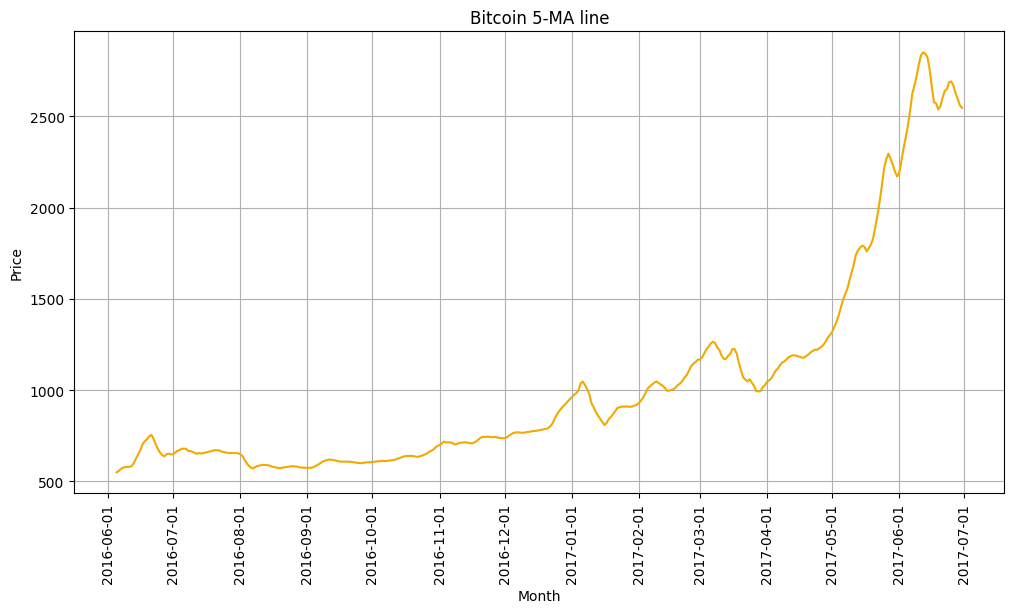

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Bitcoin 5-MA line')
plt.ylabel('Price')
plt.xlabel('Month')
plt.grid()
plt.xticks(rotation=90)

ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator(interval=1))
plt.plot(bitcoin['Date'], bit_ma5, color='#f2a900')
plt.show()

## Bonus Part
위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에 그려주세요.  
- 선의 색깔은 비트코인 : 노란색(#f2a900), 이더리움 : 검은색(#3c3c3d) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [ ]:
ethereum = pd.read_csv(os.path.join(path, 'ETH_day.csv'))
ethereum.head()

Date  Symbol    Open    High     Low   Close  Volume ETH  Volume USD
0  2020-04-15  ETHUSD  158.61  158.61  158.61  158.61        0.00        0.00
1  2020-04-14  ETHUSD  156.97  162.15  155.74  158.61    18061.58  2872210.44
2  2020-04-13  ETHUSD  158.56  159.51  150.12  156.97    15698.32  2416728.28
3  2020-04-12  ETHUSD  158.66  165.37  155.21  158.56    12877.33  2082804.05
4  2020-04-11  ETHUSD  158.26  161.49  154.25  158.66    13761.72  2172914.57

In [ ]:
ethereum = ethereum.sort_values(by='Date')
ethereum = ethereum[(ethereum['Date'] >= '2016-06-01') & (ethereum['Date'] <= '2017-06-30')]

In [ ]:
ethereum.head()

Date  Symbol   Open   High    Low  Close  Volume ETH  Volume USD
1414  2016-06-01  ETHUSD  14.18  14.35  13.54  13.95     6390.06    89027.81
1413  2016-06-02  ETHUSD  13.95  14.13  13.82  13.90      942.85    13180.38
1412  2016-06-03  ETHUSD  13.90  16.05  13.50  14.02    11426.53   157342.19
1411  2016-06-04  ETHUSD  14.02  14.16  13.64  13.86     4330.50    59977.39
1410  2016-06-05  ETHUSD  13.86  13.92  13.70  13.91      787.49    10869.67

In [ ]:
ethereum.tail()

Date  Symbol    Open    High     Low   Close  Volume ETH  \
1024  2017-06-26  ETHUSD  278.73  299.90  210.00  253.00   249076.24   
1023  2017-06-27  ETHUSD  253.00  288.17  210.02  286.21   173179.40   
1022  2017-06-28  ETHUSD  286.21  324.95  260.49  317.59   184030.56   
1021  2017-06-29  ETHUSD  317.59  322.84  285.23  293.80   152271.32   
1020  2017-06-30  ETHUSD  293.80  304.94  270.77  280.80   146545.22   

       Volume USD  
1024  60950252.99  
1023  42085473.60  
1022  54573461.77  
1021  46521350.06  
1020  42337469.59

In [ ]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 1414 to 1020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        395 non-null    object 
 1   Symbol      395 non-null    object 
 2   Open        395 non-null    float64
 3   High        395 non-null    float64
 4   Low         395 non-null    float64
 5   Close       395 non-null    float64
 6   Volume ETH  395 non-null    float64
 7   Volume USD  395 non-null    float64
dtypes: float64(6), object(2)
memory usage: 27.8+ KB


In [ ]:
eth_ma5 = ethereum['Open'].rolling(window=5).mean()

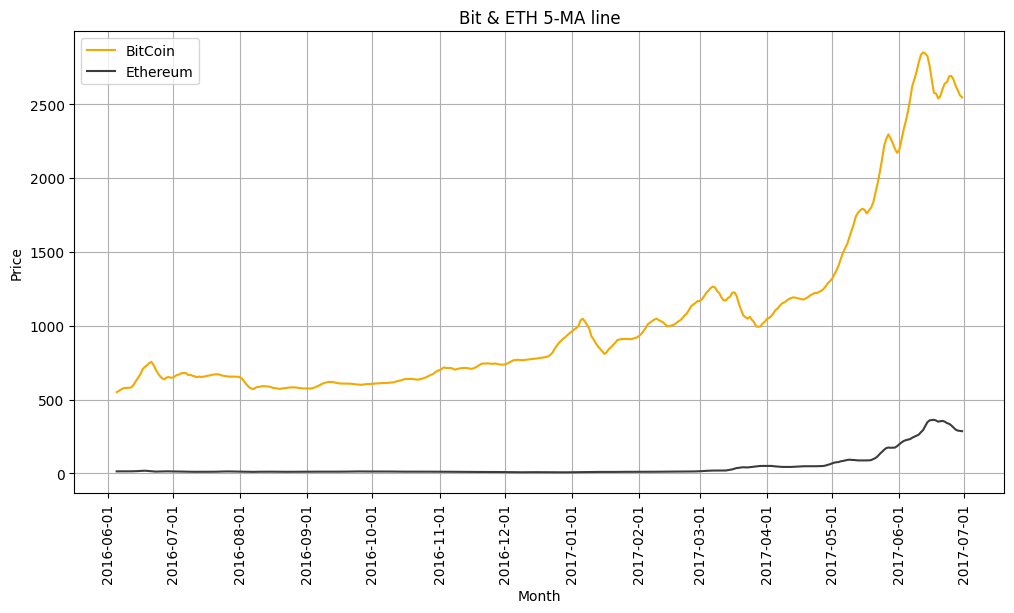

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Bit & ETH 5-MA line')
plt.ylabel('Price')
plt.xlabel('Month')
plt.grid()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mpl.dates.MonthLocator(interval=1))
plt.plot(bitcoin['Date'], bit_ma5, color='#f2a900', label='BitCoin')
plt.plot(bitcoin['Date'], eth_ma5, color='#3c3c3d', label='Ethereum')
plt.legend()
plt.show()